In [72]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.finance as mpf



def get_ohlc(df, interval):
    x = df.resample(interval).ohlc()
    ret = pd.DataFrame(
        {
            'Open': x['Open']['open'],
            'High': x['High']['high'],
            'Low': x['Low']['low'],
            'Close': x['Close']['close']
        },
         columns=['Open','High','Low','Close']
    ) 
    return ret.dropna()

def display_chart(df, width=20, height=10):
    df.plot(
        figsize=(width,height)
    )

def get_csv_path(name):
    base_path =  'rateData/new/'
    path = base_path + name + "/"+name+".csv"
    return path

def read_one_csv(name):
    file_path = get_csv_path(name)
    df = pd.read_csv(
        file_path, 
        names=('Time','Open','High','Low','Close', 'High(ASK)','Low(ASK)'),
        index_col='Time',
        parse_dates=['Time']
    )
    return df

def read_csv(name_list):
    if isinstance(name_list , str):
        name_list = [name_list]
    elif isinstance(name_list, list):
        pass
    else:
        return None
    df_list = []
    for name in name_list:
        df = read_one_csv(name)
        df_list.append(df)
    return pd.concat(df_list)

def display_candlestick(ohlc, width=0.8):
    plt.figure(figsize=(20, 10), dpi=80)
    ax = plt.subplot()
    mpf.candlestick2_ohlc(
        ax, 
        ohlc['Open'], ohlc['High'], ohlc['Low'], ohlc['Close'],
        width=width, 
        colorup='blue', colordown='red',
    )

def get_sma(ohlc, date_interval, price_type="Close"):
    selected_price = ohlc[price_type]
    ser = pd.Series(selected_price)
    sma = ser.rolling(window=date_interval,center=False).mean().dropna()
    return sma

def get_std(ohlc, date_interval,  price_type="Close"):
    di= date_interval
    selected_price = ohlc[price_type]
    ser = pd.Series(selected_price)
    std = ser.rolling(window=di,min_periods=di,center=False).std().dropna()
    return std


def get_bb(ohlc, date_interval=20, coeff=2):
    u"""
    getting Bollinger Bands
    """
    di= date_interval
    sma = get_sma(ohlc, di)
    std = get_std(ohlc, di)
    upper = sma + coeff * std
    lower = sma - coeff * std
    bb = pd.concat([upper, sma, lower], axis=1)
    return bb
    


In [60]:
data = read_csv(["201504","201505","201506"])
ohlc = get_ohlc(data, 'D')
ohlc.head()

,Open,High,Low,Close
Time,,,,
2015-04-01,120.046,120.328,119.416,119.644
2015-04-02,119.644,119.893,119.449,119.751
2015-04-03,119.751,119.939,118.718,118.905
2015-04-04,118.906,119.042,118.870,118.979
2015-04-06,118.836,119.166,118.797,118.978


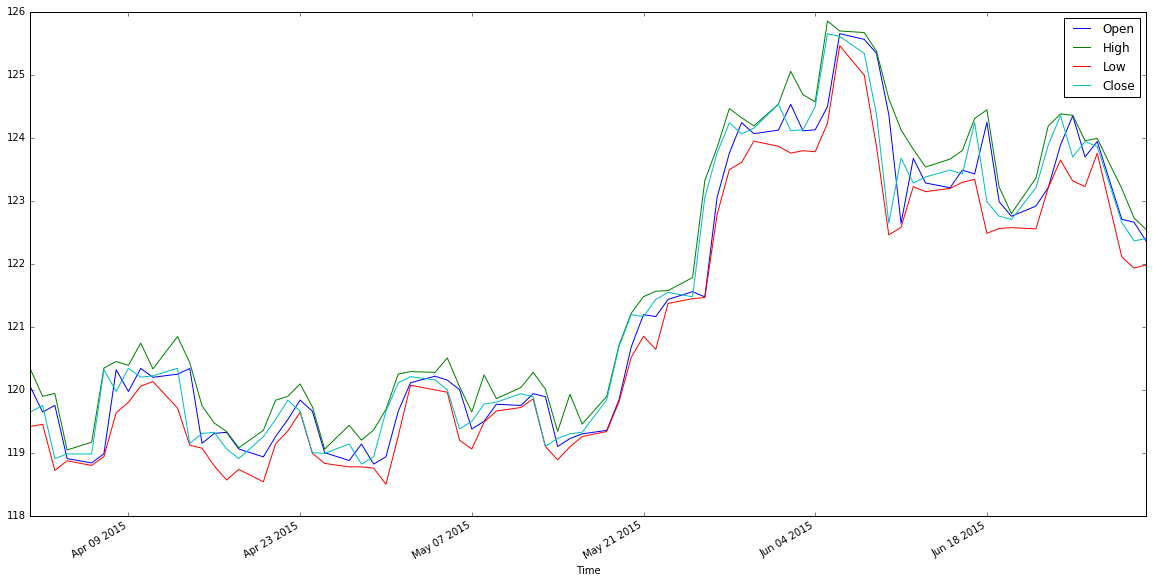

In [61]:
display_chart(ohlc)

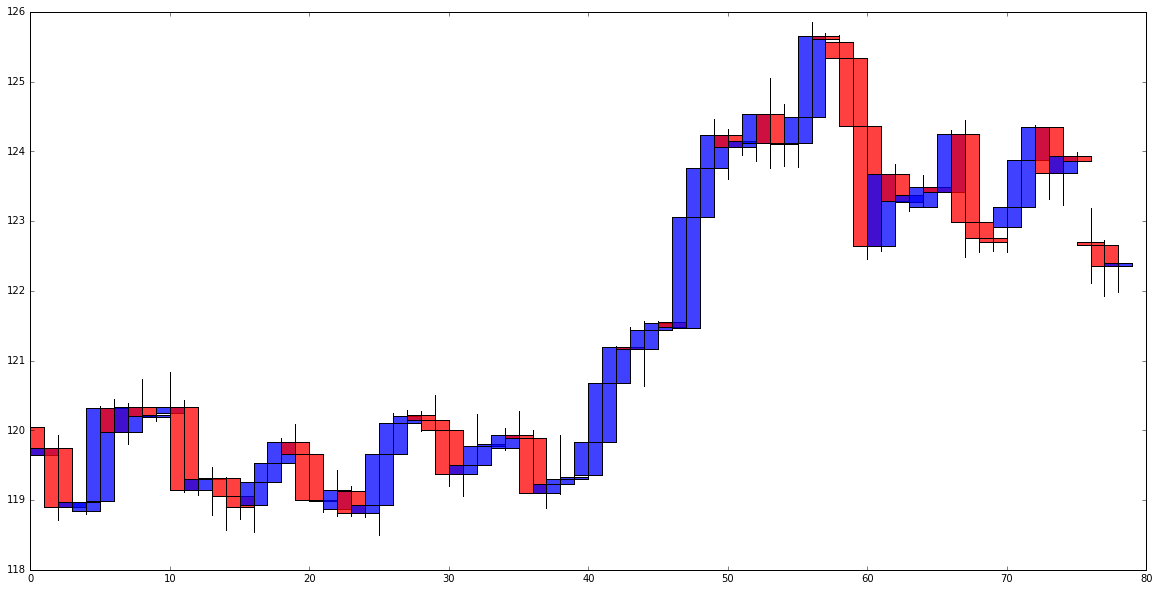

In [62]:
display_candlestick(ohlc,2.0)

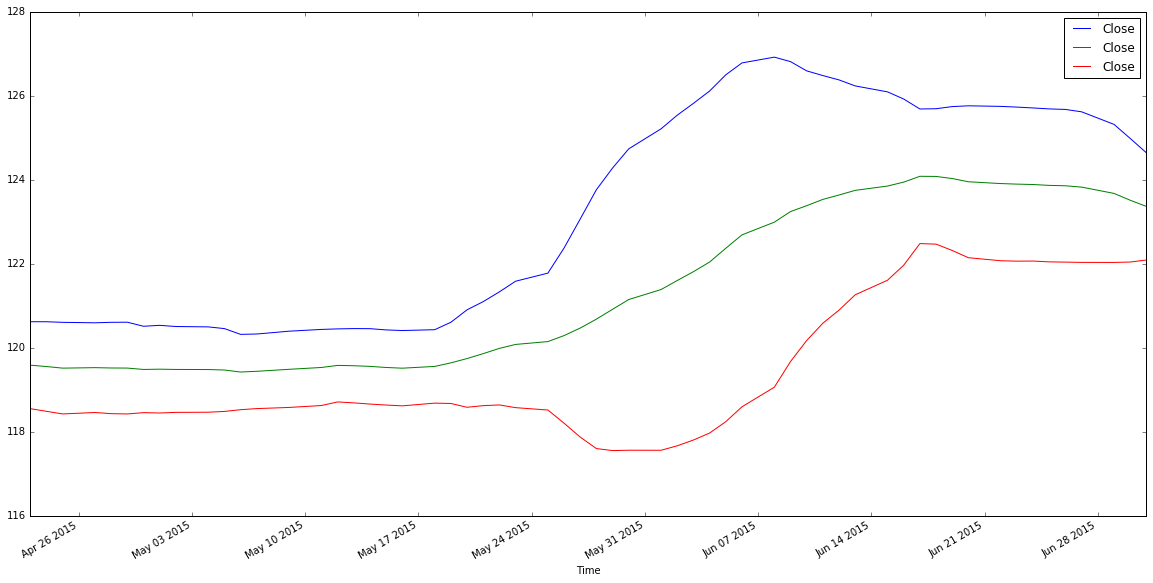

In [71]:
bb = get_bb(ohlc,20)
display_chart(bb)